In [1]:
from PreFRBLE.convenience import *
from PreFRBLE.estimate_redshift import *
from PreFRBLE.plot import *
from PreFRBLE.likelihood import *
from PreFRBLE.physics import *

import DM_Hackstein


In [2]:
scenario = {
    'IGM' : ['primordial'],
    'Host' : ['Rodrigues18/smd'],
    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}

scenario_IGM = {
    'IGM' : ['primordial'],
}

In [3]:
from astropy import units as u
from astropy.coordinates import SkyCoord, Distance
from astropy.cosmology import Planck15
from scipy import integrate


rho_crit = Planck15.critical_density0.value # g/cm3
omega_b = Planck15.Ob0
omega_m = Planck15.Om0
omega_L = Planck15.Ode0
m_p = 1.67e-24 # g
mu_e = 1.16
c = 2.99e8 # m/s
H_0 = 1./Planck15.hubble_time.value

n_e = rho_crit * omega_b  / m_p / mu_e

def DM(z, f_IGM=0.82):
    return n_e * f_IGM *c/H_0* integrate.quad( lambda z: (1+z)/( omega_m*(1+z)**3 + omega_L )**0.5, 0, z)[0]
    #return n_e * f_IGM * Distance( unit=u.pc, z = z, cosmology = Planck15).parsecb
    

Find fit for results of primordial IGM model with DM $ = C \times z \times 1000 \rm~ pc~ cm^{-3}$

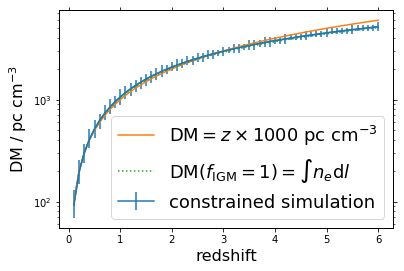

In [4]:
fig, ax = plt.subplots()

PlotAverageEstimate( measure='DM', scenario=scenario_IGM, label='constrained simulation', ax=ax)

C_primordial = 1

ax.plot( redshift_bins, redshift_bins*1000*C_primordial, label=r"DM$ = z \times 1000$ pc cm$^{-3}$" )
ax.plot( redshift_bins, [DM(z , f_IGM=1.) for z in redshift_bins], label=r"DM$(f_{\rm IGM}=1) = \int n_e {\rm d}l$", linestyle=':' )

ax.legend(fontsize=18)
AllSidesTicks(ax)

109 seconds, now for the DM
125 seconds, now for the RM
142 seconds, now for the rest


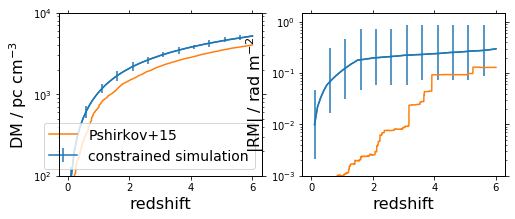

In [6]:
## compare to pshirkov estimate
B0 = 1e-3 # muG  at n_0=1.8e-7
l_c = 1 # Mpc    correlation length

t0 = time()

LoS = DM_Hackstein.Sightline( B0, l_c )

zs, dens = LoS.CreateArrays( 6.0 )
print('%.0f seconds, now for the DM' % (time() - t0))
#DMs = HowLong( LoS.DispersionMeasure, dens, zs )
#RMs = HowLong( LoS.RotationMeasure, dens, zs )

N=100

DMs = np.mean( [ LoS.DispersionMeasure( dens, zs) for i in range(N)], axis=0 )
print('%.0f seconds, now for the RM' % (time() - t0))
RMs = np.mean( [ np.abs(LoS.RotationMeasure( dens, zs)) for i in range(N)], axis=0 )
print('%.0f seconds, now for the rest' % (time() - t0))

fig, axs = plt.subplots( 1, 2, figsize=(8,3))

PlotAverageEstimate( measure='DM', scenario=scenario_IGM, label='constrained simulation', ax=axs[0], errorevery=5)
PlotAverageEstimate( measure='RM', scenario=scenario_IGM, label='constrained simulation', ax=axs[1], errorevery=5)

axs[0].plot( zs[:-1], DMs, label='Pshirkov+15')
axs[1].plot( zs[:-1], np.abs(RMs), label='Pshirkov+15')

axs[0].set_ylim(1e2,1e4)
axs[1].set_ylim(1e-3,1.5e0)
axs[0].legend(fontsize=14, loc=4)
for ax in axs:
    AllSidesTicks(ax)
#fig.tight_layout()

plt.show()


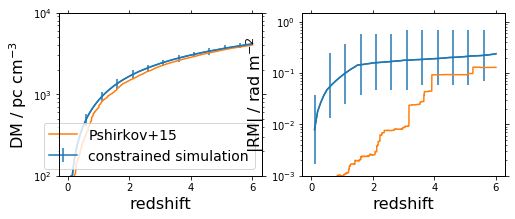

In [7]:

fig, axs = plt.subplots( 1, 2, figsize=(8,3))
tmp = { 'IGM': ['primordial_C800']}
PlotAverageEstimate( measure='DM', scenario=tmp, label='constrained simulation', ax=axs[0], errorevery=5)
PlotAverageEstimate( measure='RM', scenario=tmp, label='constrained simulation', ax=axs[1], errorevery=5)

axs[0].plot( zs[:-1], DMs, label='Pshirkov+15')
axs[1].plot( zs[:-1], np.abs(RMs), label='Pshirkov+15')

axs[0].set_ylim(1e2,1e4)
axs[1].set_ylim(1e-3,1.5e0)
axs[0].legend(fontsize=14, loc=4)
for ax in axs:
    AllSidesTicks(ax)
    
plt.show()


In [9]:
LoS.refdens/LoS.NumberDensity(0)/Planck15.Ob0

0.7169499506801384

In [29]:
a = np.arange(5)

print(a[-2::-1])
b = a[:-1]
print(b[::-1])

[3 2 1 0]
[3 2 1 0]


In [25]:
d = Planck15.lookback_distance(zs).value
l = 10.*2.3*(1+zs)**(-1.5)
B = np.ones(zs.size)

i = (d//l).astype('i')
n_flip = i[-1]+1
r = np.cos(np.random.uniform(0,2*np.pi,n_flip))

B *= r[i]



In [26]:
B

array([-0.20079405, -0.20079405, -0.20079405, ...,  0.11641205,
       -0.14611487,  0.02223296])